In [1]:
import sys
sys.path.append("../")
import numpy as np
from pyunlocbox import functions
import matplotlib.pyplot as plt
import varprons as vpns
from regularizers import TV, pos
from applications import Tomography

## Example 1

In [2]:
k = 50
n = 50
m = 50
s = np.linspace(-1.5,1.5,m)
theta = np.linspace(0,2*np.pi,k)

rng = np.random.default_rng(seed=6)

yt = np.zeros((n,n))
yt[10:20,20:40] = 1
yt[30:45,5:20] = .8
yt[34:40,35:40] = 1.5
yt = yt.flatten()
xt = np.concatenate((.05*rng.normal(size=k),.05*rng.normal(size=k)))

# create instance
example1 = Tomography(s,theta,xt,yt,sigma=1)


# objective
f = lambda x,y : example1.misfit(x = x,y = y)
r1 = functions.dummy()
r2 = pos()

# optimization parameters
Lyy = np.linalg.norm(example1.getA(xt),ord=2)**2
L = 1e6
Lb = 1e6
otol = (f(xt,yt) + r1.eval(xt) + r2.eval(yt))*1.1
itol = 5e1
maxit = 200

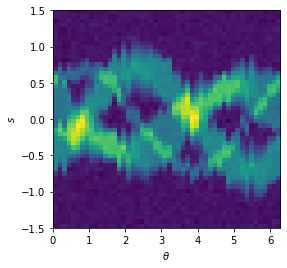

In [4]:
fig,ax=example1.plot_data()
plt.savefig('./results/tomo1_sinogram.eps')

In [6]:
# initial points
x0 = np.zeros(2*k)
y0 = example1.inner_solve(x0,np.zeros(n*n),rtol=1e-3,r2=r2)

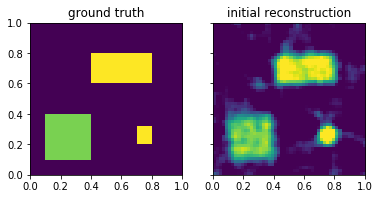

In [8]:
fig,ax = example1.plot_results([(xt,yt),(x0,y0)],['ground truth','initial reconstruction'])
plt.savefig('./results/tomo1_initial_reconstruction.eps')

In [9]:
# algorithm1
res1 = vpns.algorithm1(f,r1,r2,x0,y0,L=(L,L),tol=otol,maxit = maxit)
x1 = res1['sol'][0]
y1 = res1['sol'][1]

# algorithm 2
res2 = vpns.algorithm2(f,r1,r2,x0,y0,L=(Lb,Lyy),tol=(otol,itol),maxit=(maxit,10))
x2 = res2['sol'][0]
y2 = res2['sol'][1]

# algorithm 3 adaptive
rho = 10
res3 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = rho, tol=otol,maxit=(maxit,1000))
x3 = res3['sol'][0]
y3 = res3['sol'][1]

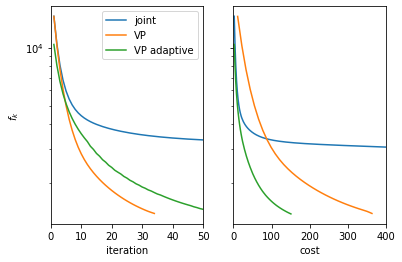

In [11]:
# plot convergence
fig, ax = vpns.plot_convergence([res1,res2,res3], ['joint','VP', 'VP adaptive'])
ax[0].set_xlim([0,50])
ax[1].set_xlim([0,400])
plt.savefig('./results/tomo1_convergence.eps')

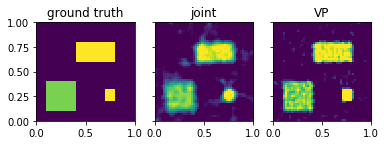

In [12]:
example1.plot_results([(xt,yt),(x1,y1),(y1,y2)],['ground truth','joint','VP'])
plt.savefig('./results/tomo1_final_reconstruction.eps')

## Example 2

In [13]:
k = 50
n = 50
m = 50
s = np.linspace(-1.5,1.5,m)
theta = np.linspace(0,2*np.pi,k)

rng = np.random.default_rng(seed=6)

yt = np.zeros((n,n))
yt[10:20,20:40] = 1
yt[30:45,5:20] = .8
yt[34:40,35:40] = 1.5
yt = yt.flatten()
xt = np.concatenate((.05*rng.normal(size=k),.05*rng.normal(size=k)))

# create instance
example2 = Tomography(s,theta,xt,yt,sigma=1)


# objective
f = lambda x,y : example1.misfit(x = x,y = y)
r1 = functions.dummy()
r2 = TV(n_=n,lambda_ = 2e1, maxit=10000)

# optimization parameters
Lyy = np.linalg.norm(example2.getA(xt),ord=2)**2
L = 1e6
Lb = 1e6
otol = (f(xt,yt) + r1.eval(xt) + r2.eval(yt))*1
itol = 5e1
maxit = 50

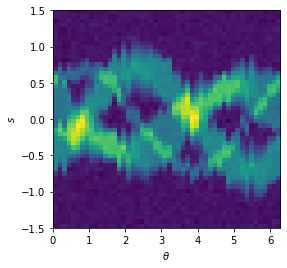

In [14]:
fig,ax=example1.plot_data()
plt.savefig('./results/tomo2_sinogram.eps')

In [16]:
# initial points
x0 = np.zeros(2*k)
y0 = example2.inner_solve(x0,np.zeros(n*n),rtol=1e-3,r2=r2)

/opt/anaconda3/lib/python3.7/site-packages/pyunlocbox/functions.py:701: RuntimeWarning: invalid value encountered in double_scalars
  rel_obj = np.abs(obj - prev_obj) / obj


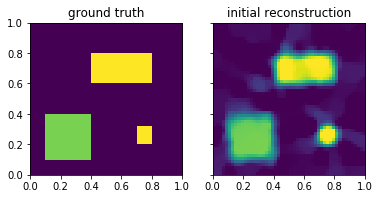

In [17]:
fig,ax = example2.plot_results([(xt,yt),(x0,y0)],['ground truth','initial reconstruction'])
plt.savefig('./results/tomo2_initial_reconstruction.eps')

In [18]:
# algorithm1
res1 = vpns.algorithm1(f,r1,r2,x0,y0,L=(L,L),tol=otol,maxit = 5*maxit)
x1 = res1['sol'][0]
y1 = res1['sol'][1]

# algorithm 2
res2 = vpns.algorithm2(f,r1,r2,x0,y0,L=(Lb,Lyy),tol=(otol,itol),maxit=(maxit,10))
x2 = res2['sol'][0]
y2 = res2['sol'][1]

# algorithm 3 adaptive
rho = 10
res3 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = rho, tol=otol,maxit=(maxit,1000))
x3 = res3['sol'][0]
y3 = res3['sol'][1]

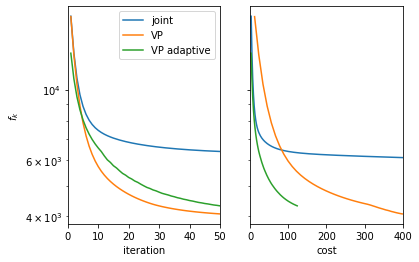

In [21]:
# plot convergence
fig, ax = vpns.plot_convergence([res1,res2,res3], ['joint','VP','VP adaptive'])
ax[0].set_xlim([0,50])
ax[1].set_xlim([0,400])
plt.savefig('./results/tomo2_convergence.eps')

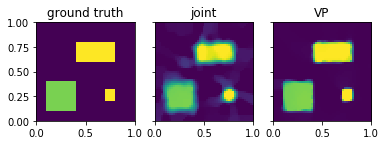

In [23]:
example2.plot_results([(xt,yt),(x1,y1),(x2,y2)],['ground truth','joint','VP'])
plt.savefig('./results/tomo2_final_reconstruction.eps')

## Example 3

In [25]:
k = 50
n = 100
m = 50
s = np.linspace(-1.5,1.5,m)
theta = np.linspace(0,2*np.pi,k)

rng = np.random.default_rng(seed=6)

from phantominator import shepp_logan
yt = shepp_logan(n).flatten()
xt = np.concatenate((.1*rng.normal(size=k),.1*rng.normal(size=k)))

# create instance
example3 = Tomography(s,theta,xt,yt,sigma=1)

# objective
f = lambda x,y : example3.misfit(x = x,y = y)
r1 = functions.dummy()
r2 = TV(n_=n,lambda_ = 2e0, maxit=5000)

# optimization parameters
Lyy = np.linalg.norm(example3.getA(xt),ord=2)**2
L = 1e6
Lb = 1e6
otol = (f(xt,yt) + r1.eval(xt) + r2.eval(yt))*1
itol = 5e1
maxit = 50

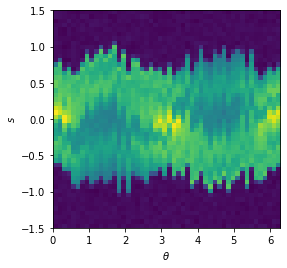

In [26]:
example3.plot_data()
plt.savefig('./results/tomo3_sinogram.eps')

In [27]:
# initial points
x0 = np.zeros(2*k)
y0 = example3.inner_solve(x0,np.zeros(n*n),rtol=1e-3,r2=r2)

/opt/anaconda3/lib/python3.7/site-packages/pyunlocbox/functions.py:701: RuntimeWarning: invalid value encountered in double_scalars
  rel_obj = np.abs(obj - prev_obj) / obj


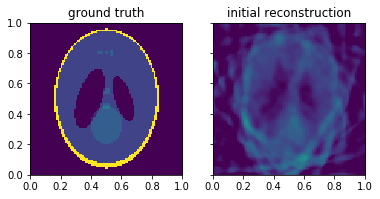

In [28]:
fig,ax = example3.plot_results([(xt,yt),(x0,y0)],['ground truth','initial reconstruction'])
plt.savefig('./results/tomo3_initial_reconstruction.eps')

In [30]:
# algorithm1
res1 = vpns.algorithm1(f,r1,r2,x0,y0,L=(L,L),tol=otol,maxit = 5*maxit)
x1 = res1['sol'][0]
y1 = res1['sol'][1]

# algorithm 2
res2 = vpns.algorithm2(f,r1,r2,x0,y0,L=(Lb,Lyy),tol=(otol,itol),maxit=(maxit,10))
x2 = res2['sol'][0]
y2 = res2['sol'][1]

# algorithm 3 adaptive
rho = 2
res3 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = rho, tol=otol,maxit=(maxit,1000))
x3 = res3['sol'][0]
y3 = res3['sol'][1]

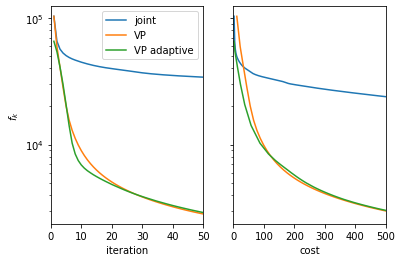

In [37]:
# plot convergence
fig, ax = vpns.plot_results([res1,res2,res3], ['joint','VP','VP adaptive'])
ax[0].set_xlim([0,50])
ax[1].set_xlim([0,500])
plt.savefig('./results/tomo3_convergence.eps')

(100,) (10000,)
(100,) (10000,)
(100,) (10000,)


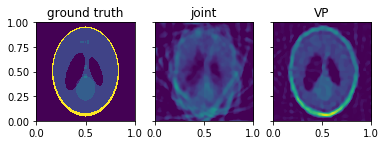

In [38]:
example3.plotResults([(xt,yt),(x1,y1),(x2,y2)],['ground truth','joint','VP'])
plt.savefig('./results/tomo3_final_reconstruction.eps')